# KoNLPy를 사용한 리뷰분석

- 한글의 경우 KoNLPy와 CountVectorizer를 함께 사용하여 감성분석을 할 수 있음
- 사용할 데이터셋은 한글로 된 영화리뷰를 모은 <Naver sentiment movie corpus v1.0> http://github.com/e9t/nsmc/ 
- 이 말뭉치는 네이버 영화사이트의 리뷰 20만개를 묶은 데이터
- KoNLPy설치: 파이썬3의 경우에 JPype1-py3를 설치해야함. 
- konlpy.org/ko/latest/install 참조
- 트위터에서 만든 한국어처리기 twitter-korean-text 를 사용

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import platform
platform.python_version

<function platform.python_version()>

In [79]:
!pip install konlpy

In [5]:
# Twitter Tag
from konlpy.tag import Twitter
twitter = Twitter()

/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [6]:
# norm은 오타 수정
# stem은 어근 탐색

list = twitter.pos("빅 데이터(영어: big data)란 기존 데이터베이스 관리도구의 능력을 넘어서는 대량(수십 테라바이트)의 정형 또는 심지어 데이터베이스 형태가 아닌 비정형의 데이터 집합조차 포함한데이터로부터 가치를 추출하고 결과를 분석하는 기술이다.", norm = True, stem = True)
print(list)

[('빅', 'Noun'), ('데이터', 'Noun'), ('(', 'Punctuation'), ('영어', 'Noun'), (':', 'Punctuation'), ('big', 'Alpha'), ('data', 'Alpha'), (')', 'Punctuation'), ('란', 'Noun'), ('기존', 'Noun'), ('데이터베이스', 'Noun'), ('관리', 'Noun'), ('도구', 'Noun'), ('의', 'Josa'), ('능력', 'Noun'), ('을', 'Josa'), ('넘어서다', 'Verb'), ('대량', 'Noun'), ('(', 'Punctuation'), ('수십', 'Noun'), ('테라바이트', 'Noun'), (')', 'Punctuation'), ('의', 'Noun'), ('정형', 'Noun'), ('또는', 'Adverb'), ('심지어', 'Noun'), ('데이터베이스', 'Noun'), ('형태', 'Noun'), ('가', 'Josa'), ('아니다', 'Adjective'), ('비정', 'Noun'), ('형', 'Suffix'), ('의', 'Josa'), ('데이터', 'Noun'), ('집합', 'Noun'), ('조차', 'Josa'), ('포함', 'Noun'), ('한', 'Determiner'), ('데이터', 'Noun'), ('로부터', 'Noun'), ('가치', 'Noun'), ('를', 'Josa'), ('추출', 'Noun'), ('하고', 'Josa'), ('결과', 'Noun'), ('를', 'Josa'), ('분석', 'Noun'), ('하다', 'Verb'), ('기술', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation')]


In [7]:
print(twitter.nouns('빅 데이터(영어: big data)란 기존 데이터베이스 관리도구의 능력을 넘어서는 대량(수십 테라바이트)의 데이터'))

['빅', '데이터', '영어', '란', '기존', '데이터베이스', '관리', '도구', '능력', '대량', '수십', '테라바이트', '의', '데이터']


In [8]:
data = ["빅 데이터(영어: big data)란",
        "기존 데이터베이스 관리도구의 능력을 넘어서는",
        "대량(수십 테라바이트)의 정형 또는 심지어 데이터베이스 형태가 아닌",
        "비정형의 데이터 집합조차 포함한데이터로부터 가치를 추출하고 결과를 분석하는 기술이다."]

results = []
for line in data:
    word_list = twitter.pos(line, norm=True, stem=True)
    words = []
    for word in word_list:
        # 문장에서 특정 품사 제거
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
    words = (" ".join(words)).strip()
    results.append(words)

In [9]:
results

['빅 데이터 영어 big data 란',
 '기존 데이터베이스 관리 도구 능력',
 '대량 수십 테라바이트 의 정형 또는 심지어 데이터베이스 형태 아니다',
 '비정 형 데이터 집합 포함 한 데이터 로부터 가치 추출 결과 분석 기술']

In [10]:
# KKoma Tag
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.morphs('빅 데이터(영어: big data)란 기존 데이터베이스 관리도구의 능력을 넘어서는 대량(수십 테라바이트)의 정형 또는 심지어 데이터베이스 형태가 아닌 비정형의 데이터 집합조차 포함한데이터로부터 가치를 추출하고 결과를 분석하는 기술이다'))

['빅', '데이터', '(', '영어', ':', 'big', 'data', ')', '이', '란', '기존', '데이터', '베이스', '관리', '도구', '의', '능력', '을', '넘어서', '는', '대량', '(', '수십', '테라', '바이트', ')', '의', '정형', '또는', '심지어', '데이터베이스', '형태', '가', '아니', 'ㄴ', '비정형', '의', '데이터', '집합', '조차', '포함', '하', 'ㄴ', '데이터', '로', '부터', '가치', '를', '추출', '하', '고', '결과', '를', '분석', '하', '는', '기술', '이', '다']


In [11]:
print(kkma.pos('빅 데이터(영어: big data)란 기존 데이터베이스 관리도구의 능력을 넘어서는 대량(수십 테라바이트)의 데이터'))

[('빅', 'NNG'), ('데이터', 'NNG'), ('(', 'SS'), ('영어', 'NNG'), (':', 'SP'), ('big', 'OL'), ('data', 'OL'), (')', 'SS'), ('이', 'VCP'), ('란', 'ETD'), ('기존', 'NNG'), ('데이터', 'NNG'), ('베이스', 'NNG'), ('관리', 'NNG'), ('도구', 'NNG'), ('의', 'JKG'), ('능력', 'NNG'), ('을', 'JKO'), ('넘어서', 'VV'), ('는', 'ETD'), ('대량', 'NNG'), ('(', 'SS'), ('수십', 'NR'), ('테라', 'NNG'), ('바이트', 'NNG'), (')', 'SS'), ('의', 'NNG'), ('데이터', 'NNG')]


In [12]:
import pandas as pd
import numpy as np
from preamble import *

- 데이터항목은 세개이고 탭으로 구분되어 있으므로 read_csv메서드를 사용할때 구분자를 탭으로 지정함. 
- 데이터에 빈 문자열이 있어도 nan으로 저장되지 않도록 keep_default_na = True로 지정하여 빈 문자열이 그대로 저장되도록 했다

In [13]:
train = pd.read_csv('SmartThings Review Kor.csv', delimiter=',', keep_default_na=False)
train.head(20)
train.tail()

,Score,Review
9394,5,좋습니다
9395,5,좋아요
9396,5,굿
9397,5,멋져요^^
9398,5,.굿


- 우리가 사용할 데이터는 'document'와 'label'열임. 레이블이 0이면 부정적인 리뷰, 1이면 긍정적인 리뷰임. 이제 pandas의 데이터프레임을 NumPy배열로 바꾼다

In [14]:
X = train['Review']
y = train["Score"]
print(X.shape)
print(y.shape)

(9399,)
(9399,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=31)

In [16]:
# #테스트데이터도 데이터프레임으로 읽은후 NumPy배열로 변환
# test = pd.read_csv('data/ratings_test.txt', delimiter='\t', keep_default_na=False)
# text_test = test['document'].as_matrix()
# y_test = test['label'].as_matrix()
# text_test.shape

In [20]:
#훈련데이터와 테스트 데이터의 크기와 클래스 비율 확인. 
# 양성과 음성 데이터수가 비슷함. 
#len(text_train), np.bincount(y_train)

In [21]:
# len(text_test), np.bincount(y_test)

In [22]:
#분류작업을 시작하기 전에 KoNLPy의 Twitter클래스의 객체를 만든다
from konlpy.tag import Twitter
twitter_tag = Twitter()

In [23]:
# TfidVectorizer의 tokenizer 매개변수에 주입할 함수를 만듬. 
# 이 함수는 텍스트 하나를 입력받아서 Twitter의 형태소분석 메서드인 morphs에서 받은
# 문자열의 리스트를 그대로 반환함. 
def twitter_tokenizer(text):
    return twitter_tag.morphs(text)

In [24]:
# TfidVectorizer의 min_df와 ngram_range, LogisticRegression의 규제 매개변수 C의 그리드서치
# make_pipeline을 사용하여 파이프라인 객체를 만들때 TfidVectorizer에 
# tokenizer=twitter_tokenizer를 지정하고 작동되는 것을 보기위해 훈련데이터 1000개사용
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

twit_param_grid = {'tfidfvectorizer__min_df': [5],
                   'tfidfvectorizer__ngram_range':[(1,1), (1,2)],
                   'logisticregression__C': [0.1]}
twit_pipe = make_pipeline(TfidfVectorizer(tokenizer=twitter_tokenizer),
                          LogisticRegression())
twit_grid = GridSearchCV(twit_pipe, twit_param_grid)

#그리드서치를 수행
twit_grid.fit(X_train[0:3000], y_train[0:3000])
print("최상의 교차검증점수 : {:.3f}".format(twit_grid.best_score_))
print("최적의 교차 검증 매개변수 : ", twit_grid.best_params_)

최상의 교차검증점수 : 0.688
최적의 교차 검증 매개변수 :  {'logisticregression__C': 0.1, 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__ngram_range': (1, 1)}


- 데이터를 1000개만 사용해도 73%에 가까운 교차검증점수임
- 테스트세트를 적용할때는 파이프라인의 tfidfvectorizer단계에서 transform 메소드를 호출한뒤 변환된 데이터를 이용해 logisticregression단계의 score함수를 호출해야함

In [25]:
X_test_konlpy = twit_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(X_test)
score= twit_grid.best_estimator_.named_steps["logisticregression"].score(X_test_konlpy, y_test)
print("테스트 세트 점수: {:.3f}".format(score))

테스트 세트 점수: 0.674


- 전체 훈련데이터를 사용해 그리드서치를 진행하면 테스트할 매개변수 조합이 많이 매우 오래걸림
- n_jobs 매개변수를 조정하여 병렬로 처리할수 있지만, C++기반의 Mecab이 필요함. 윈도우를 지원하지 않음. 
- 전체데이터를 이용하여 학습한 모델의 테스트점수는 87.5%로 분류정확도가 꽤 높음

### 토픽 모델링과 문서 군집화

- 비지도학습으로 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업
- '정치', '스포츠' '금융'등의 토픽으로 묶을수 있는 뉴스데이터가 좋은 예
- 학습된 각 성분은 하나의 토픽에 해당하며, 문서를 표현한 성분의 계수는 문서가 어떤 토픽에 얼마만큼 연관되어 잇는지 알려줌
- 사람들이 토픽모델링에 대해 이야기할때 LDA이라고 하는 특정한 성분 분해방법을 말함. 
- LDA(Latent Dirichlet Allocation), 잠재 디리클레 할당

### LDA
- LDA 모델은 함께 자주 나타나는 단어들을 기준으로 문서의 그룹(토픽)을 찾는것
- 영화 리뷰에 대해서 적용
- 비지도 학습 모델에서 분석의 결과가 왜곡되지 않으려면 자주 나타나는 단어을 제거해야 함
- 적어도 15% 문서에서 나타나는 단어를 삭제한 후 가장 많이 등장하는 단어 10,000개에 대해 BOW모델을 만들것임.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# from sklearn.datasets import load_files

# reviews_train = load_files("data/train/")
# # 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
# text_train, y_train = reviews_train.data, reviews_train.target

In [28]:
text_train = train['Review']
y_train = train["Score"]
text_train.shape

(9399,)

In [29]:
# reviews_test = load_files("data/aclImdb/test/")
# text_test, y_test = reviews_test.data, reviews_test.target

In [30]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [31]:
# 10개의 토픽으로 구분한다. 토픽은 순서를 가지고 있지 않으며, 
# 토픽의 수를 바꾸면 모든 토픽의 내용이 달라짐
# 기본학습방법("online")에 비해 조금 속도는 느리지만 성능이 더 나은 "batch"방법을 사용하겠다
# 모델성능을 위해 "max_iter(기본 10) 값을 증가시킴

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# 모델 생성과 변환을 한 번에 합니다 (시간절약)
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

In [32]:
# 토픽마다 각 단어의 중요도를 저장한 components_ 속성이 있음
# componenets의 크기는 (n_topics, n_words) 이다
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [33]:
# 각 토픽이 의미하는 것이 무엇인지 이해하기 위해 토픽에서 가장 중요한 단어를 확인
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [34]:
arr = np.arange(0,12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
arr[:, ::-1]

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8]])

In [36]:
feature_names.shape

(10000,)

In [37]:
# 10개의 토픽을 출력합니다. print_topics는 특성들을 정돈하여 출력하는 함수임
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
#토픽1은 역사와 전쟁영화, 토픽2는 코미디물, 토픽3:TV시리즈, 토픽4:매우일반적인단어
#토픽6:어린이영화, 토픽8:영화제와 관련한 리뷰

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
편해요           좋네요           편리합니다         good          있습니다          
역시            정말            감사합니다         너무좋아요         사용하고          
좋아용           편리해요          정말            연결이           아주            
삼성            사용하기          연결이           삼성            있어요           
편합니다          편하네요          업데이트          안되네요          쓰고            
너무            있어서           삼성            어플            잘쓰고           
연결이           너무            공기청정기         좋은데           유용하게          
완전            유용하게          입니다           스마트           너무            
연결해서          간편하고          매우            많이            만족합니다         
samsung       에어컨           안되네요          좀더            에어컨           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
조아요 

In [38]:
# 100개의 토픽으로 새로운 모델을 학습
# 많은 토픽을 사용하면 분석은 더 어려워지지만 데이터에서 특이한 부분을 잘 잡아냄
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0, n_jobs=-1)
document_topics100 = lda100.fit_transform(X)

In [39]:
# # 100개의 토픽을 모두 나열하면 너무 길어지므로 재미있는 대표 토픽만 보겠다
topics = np.array(10)
topics

array(10)

In [40]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=[0,1,2,3,4,5,6,7,8,9], feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

#토픽7:공포영화스릴러, 16,54:부정적인리뷰, 63:코미디에관한 긍정적인리뷰
#토픽을 이용해 추론을 잘 하려면 토픽에 할당된 문서를 보고 가장 높은 순위에 있는
#단어의 의미를 확인해야함
#토픽 36은 음악에 관한것. 

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
편해요           좋네요           편리합니다         good          있습니다          
역시            정말            감사합니다         너무좋아요         사용하고          
좋아용           편리해요          정말            연결이           아주            
삼성            사용하기          연결이           삼성            있어요           
편합니다          편하네요          업데이트          안되네요          쓰고            
너무            있어서           삼성            어플            잘쓰고           
연결이           너무            공기청정기         좋은데           유용하게          
완전            유용하게          입니다           스마트           너무            
연결해서          간편하고          매우            많이            만족합니다         
samsung       에어컨           안되네요          좀더            에어컨           
다시            연결해서          냉장고           최고입니다         연결이           
엄청            업데이트          사용중인데         업데이트          다시            
정말    

In [41]:
# 음악에 관한 토픽 36과 관련된 리뷰를 찾아보겠다.
music = np.argsort(document_topics[:, 6])[::-1]
# 이 토픽의 가장 비중이 큰 문서 10개를 출력합니다
for i in music[:10]:
    # 첫 두 문장을 출력합니다
    print(".".join(text_train[i].split(".")[:2]) + ".\n")

삼성 큐브 공기청정기를 사용 중인데 스마트 에어에서 내방 공기청정 정보가 뜨지 않습니다. 공기청정기를 켜라고 하는데 켜져 있음에도 꺼져있다고 인식합니다.

직전 리모컨 기능은 좋았으나 이번 업데이트로 리모컨에서 확인버튼을 누르면 안눌러지고 . 꾸욱 눌러야 클릭이 됨.

아니 가뜩이나 32기가도 부족해서 지우고 쓰는 마당에 왜 지멋대로 깔고 지우지도 못하게해!! 티비도 안보고 전등도 이걸로 켜고 끌수있는 기능 있는게 아니고 에어컨은 직접 켜고 끄면되는데 왜 멋대로 깔고 용량 냠냠하냐고ㅡㅡ.

꺼짐이나 켜짐 예약이 없어서 아쉬워요~~청소모드 설정됬는지 확인가능하면좋겠어요 그리고 필터청소 팝업창뜬것같은데 눌러서 들어가니 사라져버리고 2in1인데 어떤걸 청소해라는건지 확인가능할수있음 좋을것같아요~~ 더운날 미리 켜짐 기능은 최고에요ㅋ.

건조기 켜서 사용중일때만 에너지 모니터링되고 꺼지면 에너지 사용량은 볼수도 없고 참ㅡㅡ;; 공청은 켜져서 와이파이 연결 됐는데 앱에서는 연결안됨으로 뜨고 도데체 이걸로 뭘 하라는건지..

리뷰 안 남기는 편이지만 남겨야겠네요 업뎃 이후 기어s2랑 연결은 개판이고 블루투스 이어폰은 끈김 심해짐 기어s2연결은 분명 
블루투스인데도 화면에는 시리얼 포트 사용이라고 나오고 정말 x같아짐 어째든간 삼성을 사용중이니 쓰겠지만 앱 개판으로 할꺼면 건드리지 
않는게 나을듯 하네요.

아진짜짜증나네요. 잘될땐 너무 잘쓰고잇엇는데 몇일전부터 자꾸 전원을 연결을 하라는둥.

업데이트 이후 티비 리모컨 사용시 상하좌우 선택 버튼 밑에 접기 더보기가 생겼는데, 고정상태로 계속 쓸수있던 전 스타일이 낫습니다. 밑으로 내리다보면 자꾸 접기버튼이 같이 눌림.

블루투스이어폰+노트8휴대폰블루투스연결+휴대폰이어폰단자+오디오연결 오디오음악듣기 전화수신시 첫번째 블루투스연결오류>오디오통화 
휴대폰잰더+오디오연결유지>음악듣기>통화시블루투스이어폰휴대폰연결가능 이어폰단자연결 어플받기전에는 
블루투스이어폰+휴대폰+오디오+통신수신시블루투스이어폰+휴대폰직통>통화종료시 음악듣기 잘

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


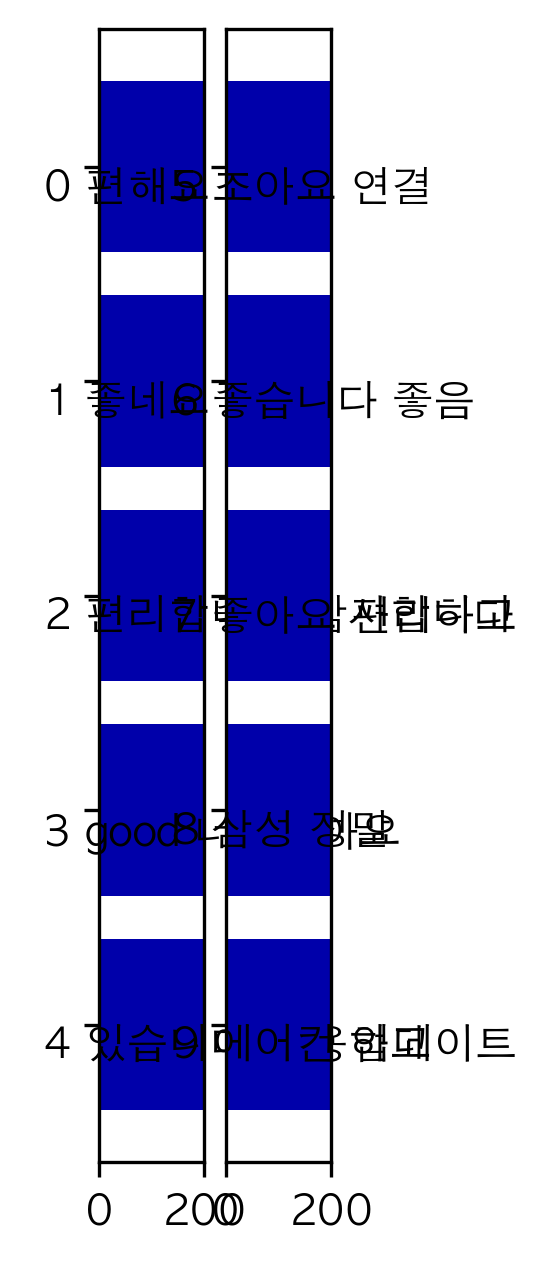

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(1, 5))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 두개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 5
    end = (col + 1) * 5
    ax[col].barh(np.arange(5), np.sum(document_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(5))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 200)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=13)
plt.tight_layout()